In [1]:
import sys
sys.path.append(r'C:\Users\ebers\Documents\GitHub Repositories\L02-PythonEngineeringLibrary')
from EngLib.Beam import *
import matplotlib.pyplot as plt
import numpy as np
import joblib

Known Loadings: [['q_dist_1', [93.48352941176474, 94.40901635294121], [0.0, 0.017], 1.5970866390000007, 0.008513955918204887, 54.44040830449841, 93.48352941176474], ['q_dist_2', [94.40901635294121, 95.31580658823533], [0.017, 0.034], 1.6126609950000008, 0.025513541923298022, 53.34060207612497, 93.50222611764708], ['q_dist_3', [95.31580658823533, 96.2039001176471], [0.034, 0.051], 1.627917507, 0.04251313841297734, 52.240795847750725, 93.53961952941181], ['q_dist_4', [96.2039001176471, 97.0732969411765], [0.051, 0.068], 1.6428561750000013, 0.05951274486094316, 51.14098961937641, 93.5957096470589], ['q_dist_5', [97.0732969411765, 97.92399705882356], [0.068, 0.085], 1.6574769990000007, 0.0765123607715295, 50.041183391003834, 93.67049647058823], ['q_dist_6', [97.92399705882356, 98.75600047058826], [0.085, 0.102], 1.6717799789999992, 0.09351198567739277, 48.9413771626296, 93.76398000000005], ['q_dist_7', [98.75600047058826, 99.56930717647062], [0.102, 0.11900000000000001], 1.685765115000002,

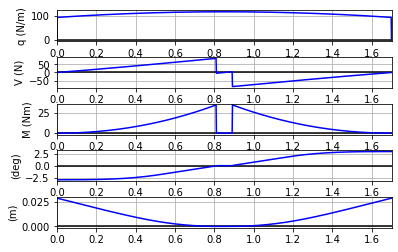

In [2]:
#### Problem Definition
b = 1.7
mass = 2.1
G_Loading = 6
g = 9.81
SF = 1.5


### Calculate a simulated distributed loading
r = 0.8

A = [[(b**3)/12,b],[(b**2)/4,(1-r)]]
B = [mass*g*G_Loading*SF,0]
a,c = np.linalg.solve(A,B)

def DistributedLoading(x):
    return a*x**2 + c


UpdatedIValue = joblib.load("C:\\Users\\ebers\\Documents\\GitHub Repositories\\P02-TuksProjects\\Y4-MLV420\\SparDesign\\IvalueData.txt")

### Loadcase 1

UPW_LC1 = Beam(b)
UPW_LC1.add_fixed_support('a',b/2 + 0.04)
UPW_LC1.add_fixed_support('b',b/2 - 0.04)

for i in UpdatedIValue:
    UPW_LC1.define_I(i[1][0],i[1][1],i[0])


NumElemDist = 100


for i in range(NumElemDist):
    x0 = (i/NumElemDist)*b
    x1 = ((i+1)/NumElemDist)*b
    UPW_LC1.distributed_loading('dist_'+ str(i+1),[DistributedLoading(x0-b/2),DistributedLoading(x1-b/2)],[x0,x1])


UPW_LC1.solve_beam()

UPW_LC1.plot_beam_diagrams(save=False)

In [3]:
from BeamLib import *

ElasticModulus: 210000000000.0
0
Q1 93.48352941176474
Q2 94.40901635294121
Q1 94.40901635294121
Q2 95.31580658823533
Q1 95.31580658823533
Q2 96.2039001176471
Q1 96.2039001176471
Q2 97.0732969411765
Q1 97.0732969411765
Q2 97.92399705882356
Q1 97.92399705882356
Q2 98.75600047058826
Q1 98.75600047058826
Q2 99.56930717647062
Q1 99.56930717647062
Q2 100.36391717647062
Q1 100.36391717647062
Q2 101.13983047058827
Q1 101.13983047058827
Q2 101.89704705882356
Q1 101.89704705882356
Q2 102.6355669411765
Q1 102.6355669411765
Q2 103.35539011764709
Q1 103.35539011764709
Q2 104.05651658823533
Q1 104.05651658823533
Q2 104.73894635294121
Q1 104.73894635294121
Q2 105.40267941176474
Q1 105.40267941176474
Q2 106.04771576470591
Q1 106.04771576470591
Q2 106.67405541176474
Q1 106.67405541176474
Q2 107.2816983529412
Q1 107.2816983529412
Q2 107.87064458823534
Q1 107.87064458823534
Q2 108.44089411764709
Q1 108.44089411764709
Q2 108.9924469411765
Q1 108.9924469411765
Q2 109.52530305882357
Q1 109.52530305882357
Q2

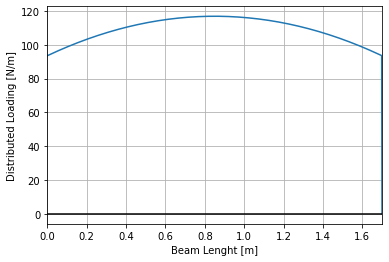

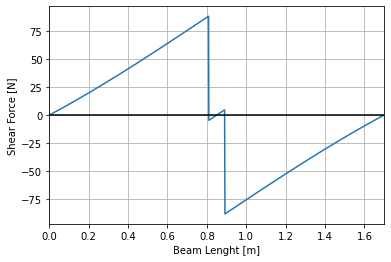

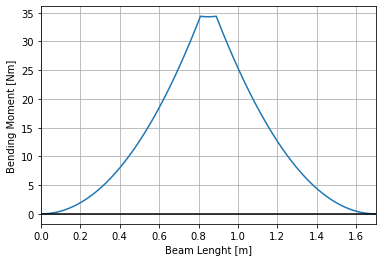

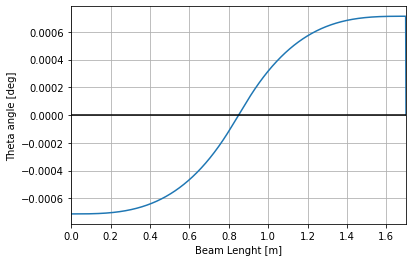

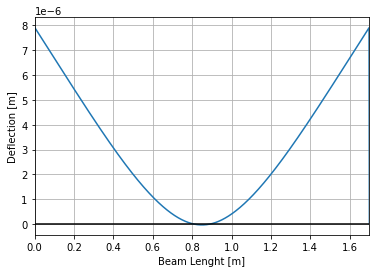

In [5]:
#### Problem Definition
b = 1.7
mass = 2.1
G_Loading = 6
g = 9.81
SF = 1.5


### Calculate a simulated distributed loading
r = 0.8

A = [[(b**3)/12,b],[(b**2)/4,(1-r)]]
B = [mass*g*G_Loading*SF,0]
a,c = np.linalg.solve(A,B)

def DistributedLoading(x):
    return a*x**2 + c


#UpdatedIValue = joblib.load("C:\\Users\\ebers\\Documents\\GitHub Repositories\\P02-TuksProjects\\Y4-MLV420\\SparDesign\\IvalueData2.txt")

### Loadcase 1


BeamStructure = Beam(b)
#BeamStructure.I_Value = UpdatedIValue

UPW_LC1 = BeamLab(BeamStructure)
UPW_LC1.AddLoadCase('UPW_LC1')
print(BeamStructure.X_Start)
UPW_LC1.LoadCases['UPW_LC1'].AddPinnedSupport('a', Position = b/2 + 0.04)
UPW_LC1.LoadCases['UPW_LC1'].AddPinnedSupport('b', Position = b/2 - 0.04)

NumElemDist = 100


for i in range(NumElemDist):
    x0 = (i/NumElemDist)*b
    x1 = ((i+1)/NumElemDist)*b
    UPW_LC1.LoadCases['UPW_LC1'].AddDistributedLoading('dist_'+ str(i+1), Positions = [x0,x1],Magnitudes = [DistributedLoading(x0-b/2),DistributedLoading(x1-b/2)])

UPW_LC1.SolveAll()
UPW_LC1.PlotAll()